In [87]:
from utils_v1 import *


In [88]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric


In [89]:

config = {
	"training": False,
	"save_probabilities": False,
	"loadInference": False,
	"addPastDeforestationInput": True,
	"inference_times": 1
}

'''
if config["training"] == True:
	dates = [2017, 2018]
else:
	dates = [2018, 2019]
if config["training"] == True:
	dates = [2018, 2019]
else:
	dates = [2019, 2020]
'''
dates = [2018, 2019]
ic(dates)
dataset = PAMultipleDates(dates = dates, # dates = [2017, 2018, 2019]. [2018, 2019]. [2015, 2016, 2017, 2018]
	addPastDeforestationInput = config['addPastDeforestationInput'],
	borderBuffer = 2)	
# dataset = MTMultipleDates(dates = dates, # dates = [2016,2017,2018,2019]
# 	addPastDeforestationInput = addPastDeforestationInput,
# 	borderBuffer = 2)	
# dataset = MTDeforestationTime()	
# [2016, 2017, 2018]


if issubclass(type(dataset), MultipleDates):
	patchesHandler = PatchesHandlerEvidential(
		dataset)
else:
	patchesHandler = PatchesHandler()

exp = 142

# if config["training"] == True:
trainer = TrainerEvidential(config, dataset, patchesHandler)

trainer.defineExperiment(exp)


ic| dates: [2018, 2019]
ic| list(self.date_ids): [0]
ic| self.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
ic| self.input_image_shape: 21
ic| self.dataset.image_channels: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]


In [90]:
exp

142

In [91]:

trainer.createLogFolders()

In [92]:
# ic(type(dataset), exp, dataset.dates)


In [93]:

trainer.loadLabel()

D:/Jorge/datasets/deforestation/Para/deforestation_past_years.tif
Loaded deforestation past years


In [ ]:

# Creating tile mask
trainer.createTrainValTestTiles()


Tiles size:  3546 2300
Mask size:  (17730, 9200)


In [ ]:

trainer.label_mask.dtype

dtype('uint8')

In [ ]:

trainer.getLabelCurrentDeforestation()

In [ ]:

trainer.loadInputImage()

ic| image_stack.shape: (17730, 9203, 21)


Image shape:  (17730, 9203, 21)
mask:  (17730, 9200)
image stack:  (17730, 9200, 21)
ref : (17730, 9200, 1)


In [ ]:

np.unique(trainer.image_stack[...,0], return_counts=True)

(array([0.        , 0.08333334, 0.16666667, 0.25      , 0.33333334,
        0.4166667 , 0.5       , 0.5833334 , 0.6666667 , 0.75      ,
        0.8333334 , 0.9166667 , 1.        ], dtype=float32),
 array([104050616,   2209014,    644713,    968315,   1458862,   1560879,
          2477424,   1299508,    903419,    864429,   4570932,   3150455,
         38957434], dtype=int64))

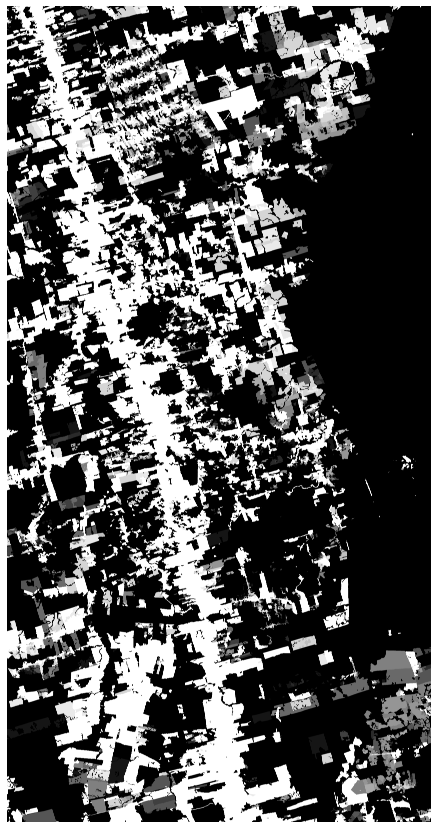

In [ ]:

trainer.logger.plotFigure(trainer.image_stack[...,0], 
    name='image_stack_first_channel', cmap=plt.cm.gray, savefig=False)

In [ ]:

trainer.getImageChannels()

ic| self.image_stack.shape: (17730, 9200, 21)
ic| self.channels: 21


In [ ]:

trainer.getTrainValTestMasks()

Training tiles:  [1, 3, 5, 8, 11, 13, 14, 20]
Validation tiles:  [6, 19]
Test tiles:  [2, 4, 7, 9, 10, 12, 15, 16, 17, 18]


In [ ]:

if config["training"] == True:
    # Extracting patches from the idx matrix
    trainer.createIdxImage()


In [ ]:
if config["training"] == True:
    trainer.extractCoords()

In [ ]:
if config["training"] == True:
    trainer.trainTestSplit()

In [ ]:
if config["training"] == True:
    trainer.label_mask.shape

In [ ]:
if config["training"] == True:
    if type(dataset) != PADeforestationTime and type(dataset) != MTDeforestationTime:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)

    else:
        trainer.logger.plotFigure(trainer.label_mask[...,-1], 
            name='Reference', cmap=plt.cm.gray, savefig=False)



In [ ]:
if config["training"] == True:
    np.unique(trainer.label_mask)

In [ ]:
if config["training"] == True:
    print(trainer.coords_train)

In [ ]:
if config["training"] == True:
    trainer.retrieveSamplesOfInterest()

In [ ]:
if config["training"] == True:
    inputSnipShow = True

In [ ]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 2800)


In [ ]:
if config["training"] == True:
    if inputSnipShow == True:
        trainer.snipDataset(idx = 97)


In [ ]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 1200)

In [ ]:
if config["training"] == True:
    if inputSnipShow == True:

        trainer.snipDataset(idx = 400)

In [ ]:
if config["training"] == True:
    trainer.getGenerators()


In [ ]:
if config["training"] == True:
    trainer.fixChannelNumber()

In [ ]:
if config["training"] == True:
    print(trainer.path_exp)

In [ ]:
if config["training"] == True:
    print(trainer.channels)

In [ ]:
if config["training"] == True:
    print(trainer.image_stack.shape)

### Evidential metrics

In [ ]:
if config["training"] == True:
    trainer.train()

In [ ]:
if config["training"] == True:
    trainer.plotHistory()


In [ ]:
if config["training"] == True:
    trainer.plotLossTerms()

In [ ]:
if config["training"] == True:
    trainer.plotAnnealingCoef()

In [ ]:
def draw_EDL_results(K, history):
    # train_acc1, train_ev_s, train_ev_f, test_acc1, test_ev_s, test_ev_f 
    # calculate uncertainty for training and testing data for correctly and misclassified samples
    '''
    K: known classes
    '''
    train_u_succ = K / (K+np.array(history['evidential_success']))
    train_u_fail = K / (K+np.array(history['evidential_fail']))
    test_u_succ  = K / (K+np.array(history['val_evidential_success']))
    test_u_fail  = K / (K+np.array(history['val_evidential_fail']))
    
    f, axs = plt.subplots(2, 2)
    f.set_size_inches([10,10])
    
    axs[0,0].plot(history['evidential_success'],c='r',marker='+')
    axs[0,0].plot(history['evidential_fail'],c='k',marker='x')
    axs[0,0].set_title('Train Data')
    axs[0,0].set_xlabel('Epoch')
    axs[0,0].set_ylabel('Estimated total evidence for classification') 
    axs[0,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[0,1].plot(train_u_succ,c='r',marker='+')
    axs[0,1].plot(train_u_fail,c='k',marker='x')
    axs[0,1].plot(history['acc'],c='blue',marker='*')
    axs[0,1].set_title('Train Data')
    axs[0,1].set_xlabel('Epoch')
    axs[0,1].set_ylabel('Estimated uncertainty for classification')
    axs[0,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    
    axs[1,0].plot(history['val_evidential_success'],c='r',marker='+')
    axs[1,0].plot(history['val_evidential_fail'],c='k',marker='x')
    axs[1,0].set_title('Test Data')
    axs[1,0].set_xlabel('Epoch')
    axs[1,0].set_ylabel('Estimated total evidence for classification') 
    axs[1,0].legend(['Correct Clasifications','Misclasifications'])
    
    axs[1,1].plot(test_u_succ,c='r',marker='+')
    axs[1,1].plot(test_u_fail,c='k',marker='x')
    axs[1,1].plot(history['val_acc'],c='blue',marker='*')
    axs[1,1].set_title('Test Data')
    axs[1,1].set_xlabel('Epoch')
    axs[1,1].set_ylabel('Estimated uncertainty for classification')
    axs[1,1].legend(['Correct clasifications','Misclasifications', 'Accuracy'])
    

In [ ]:
if config["training"] == True:
    draw_EDL_results(trainer.class_n, trainer.history.history)

    plt.figure(5)
    plt.plot(trainer.history.history['evidential_success'],c='r',marker='+')
    plt.plot(trainer.history.history['evidential_fail'],c='k',marker='x')
    plt.title('Train Data')
    plt.xlabel('Epoch')
    plt.ylabel('Estimated total evidence for classification') 
    plt.legend(['Correct Clasifications','Misclasifications'])


In [ ]:
trainer.image_stack.shape

(17730, 9200, 21)

In [ ]:
if type(trainer.dataset) != PADeforestationTime and type(trainer.dataset) != MTDeforestationTime:
    trainer.patchesHandler.dataset.image_channels[-1]

In [ ]:
if issubclass(type(dataset), MultipleDates):
	trainer.channels = trainer.patchesHandler.input_image_shape
	trainer.image_stack = trainer.image_stack[..., trainer.patchesHandler.dataset.image_channels[-1]]
	trainer.label_mask = trainer.label_mask[...,-1]

In [ ]:
trainer.image_stack.shape

(17730, 9200, 21)

In [ ]:
trainer.setPadding()

-30.0 -16.0


In [ ]:
trainer.infer()

ic| self.path_models+ '/' + self.method +'_'+str(0)+'.h5': 'D:/Jorge/datasets/deforestation/experiments/exp142/models/resunet_0.h5'


time:  0


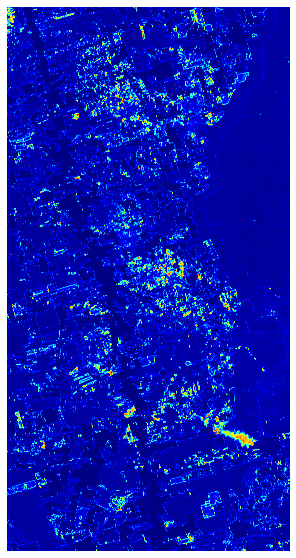

In [ ]:
trainer.logger.plotFigure(trainer.u_reconstructed, 
            name='Uncertainty', cmap='jet', savefig=False, figsize=(10,10))

In [ ]:
trainer.loadPredictedProbabilities()


In [ ]:
trainer.prob_rec.shape

(17760, 9216)

In [ ]:
trainer.getMeanProb()

In [ ]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0066989684
    np.mean(value): 0.039190564
    np.max(value): 0.937746


In [ ]:
ic(trainer.mean_prob.shape)

ic| trainer.mean_prob.shape: (17760, 9216)


(17760, 9216)

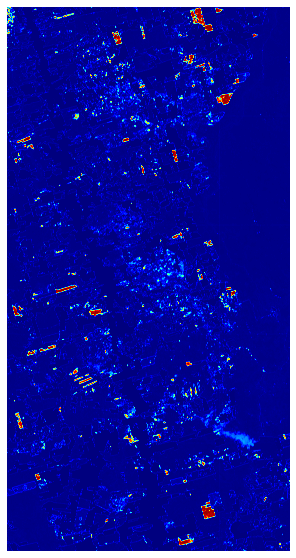

In [ ]:
trainer.unpadMeanProb()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

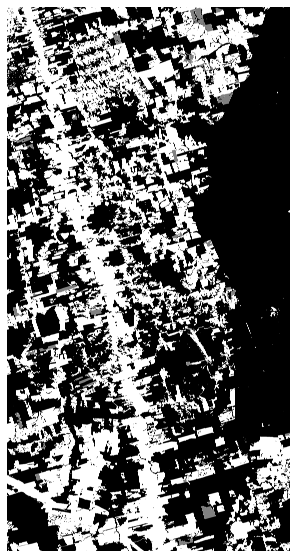

In [ ]:
trainer.logger.plotFigure(trainer.label_mask, 
            name='Reference mask', figsize=(10,10), cmap=plt.cm.gray, savefig=True)

In [ ]:
trainer.squeezeLabel()

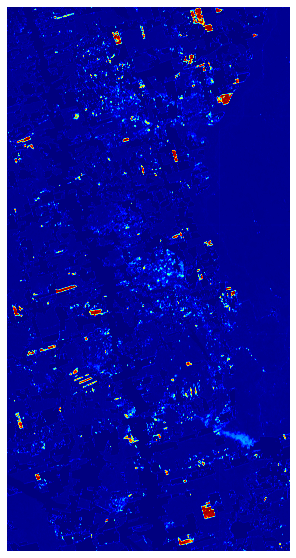

In [ ]:
trainer.setMeanProbNotConsideredAreas()
trainer.logger.plotFigure(trainer.mean_prob, 
            name='Mean predicted probability', figsize=(10,10), cmap='jet', savefig=False)

In [ ]:
trainer.logger.getStats(trainer.mean_prob)

ic| np.min(value): 0.0
    np.mean(value): 0.03262384
    np.max(value): 0.937746


In [ ]:
print(trainer.label_mask.shape)

(17730, 9200)


In [ ]:
trainer.getLabelTest()

(54236371,)
(array([0, 1], dtype=uint8), array([53470765,   765606], dtype=int64))


In [ ]:
trainer.getMAP()

88.33


In [ ]:
trainer.prob_rec.shape

(17760, 9216)

In [ ]:
trainer.preprocessProbRec()
print(trainer.prob_rec.shape)

(17760, 9216, 1)


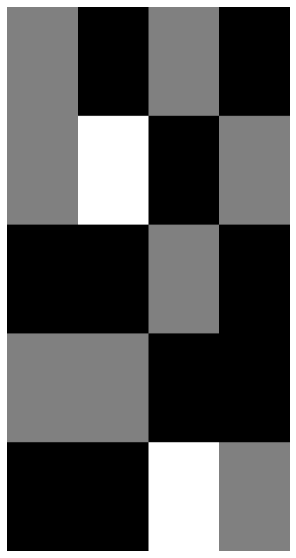

In [ ]:
trainer.logger.plotFigure(trainer.mask_tr_val, 
            name=trainer.dataset.site + trainer.title_name + ' Train val mask.png', figsize=(10,10), savefig=False)

In [ ]:
trainer.getLabelCurrentDeforestation()

In [ ]:
trainer.applyProbabilityThreshold()

(17730, 9200)
(array([0., 1.], dtype=float32), array([161030445,   2085555], dtype=int64))


ic| self.predicted_unpad.shape: (17730, 9200)
    self.predicted.shape: (17730, 9200)


In [ ]:
trainer.getTestValues()

ic| predicted_test.shape: (81558000,)
ic| predicted_test.shape: (54236371,)


In [ ]:
trainer.removeSmallPolygons()

ic| np.unique(predicted, return_counts=True): (array([0., 1.], dtype=float32), array([161030445,   2085555], dtype=int64))
    np.unique(predicted_larger_than_min_area, return_counts=True): (array([0., 1.], dtype=float32), array([161248556,   1867444], dtype=int64))
ic| np.unique(ignored_polygons, return_counts=True): (array([0., 1.], dtype=float32), array([162897889,    218111], dtype=int64))
ic| predicted.shape: (17730, 9200), label_mask.shape: (17730, 9200)
ic| predicted_masked.shape: (81558000,)
    label_masked.shape: (81558000,)
ic| np.unique(label_masked, return_counts=True): (array([0, 1, 2], dtype=uint8),
                                                  array([53392196,   734676, 27431128], dtype=int64))
ic| predicted_masked.shape: (54126872,)
    label_masked.shape: (54126872,)


In [ ]:
trainer.calculateMetrics()

ic| f1: 82.74, precision: 81.5, recall: 84.02


In [ ]:
trainer.getValidationValuesForMetrics()
trainer.calculateMetricsValidation()

ic| self.label_mask_val.shape: (16311600,)
ic| self.label_mask_val_valid.shape: (9425299,)
ic| f1_val: 86.28
    precision_val: 81.36
    recall_val: 91.84
    mAP_val: 90.74


In [ ]:
calculateMAPWithoutSmallPolygons = False
if calculateMAPWithoutSmallPolygons == True:
    trainer.calculateMAPWithoutSmallPolygons()

In [ ]:
trainer.getErrorMask()

(array([0., 1.], dtype=float32), array([162445924,    670076], dtype=int64))


In [ ]:
'''

import types

trainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)
'''


'\n\nimport types\n\ntrainer.getErrorMaskToShowRGB = types.MethodType(getErrorMaskToShowRGB, trainer)\n'

In [ ]:
trainer.getErrorMaskToShowRGB()

In [ ]:

'''
trainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)
'''

'\ntrainer.logger.plotFigure = types.MethodType(trainer.logger.plotFigure, trainer)\n'

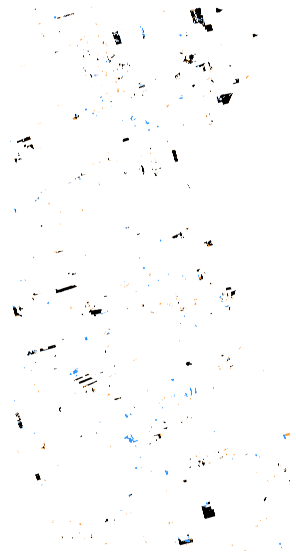

In [ ]:
trainer.logger.plotFigure(trainer.error_mask_to_show_rgb[...,::-1], 
            name=trainer.dataset.site + trainer.title_name + ' error mask color.png', 
            figsize=(10,10), savefig=True, dpi=300)

In [ ]:
trainer.getValidationValues2()
trainer.getTestValues2()

ic| self.label_mask.shape: (17730, 9200)
ic| self.mask_amazon_ts.shape: (17730, 9200)
ic| self.label_mask_test.shape: (81558000,)
ic| self.error_mask_test.shape: (54126872,)


In [ ]:
trainer.setUncertainty()

In [ ]:
trainer.getUncertaintyToShow()
trainer.logger.getStats(trainer.uncertainty_to_show)


In [ ]:
trainer.logger.plotFigure(trainer.uncertainty_to_show, 
            name=trainer.dataset.site + trainer.title_name + ' uncertainty evidential learning.png', figsize=(10,10), cmap='jet', savefig=True)

ic| trainer.dataset.previewLims1: array([2200, 3200, 6900, 7900])
    trainer.dataset.previewLims2: array([ 500, 1500, 3500, 4500])
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]]): array([1], dtype=uint8)
ic| np.unique(trainer.mask_amazon_ts[lims[0]:lims[1], lims[2]:lims[3]], return_counts=True): (array([1], dtype=uint8), array([1000000], dtype=int64))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


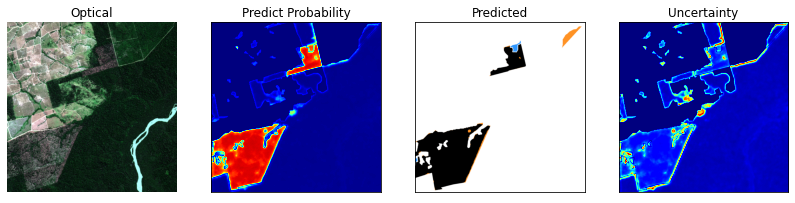

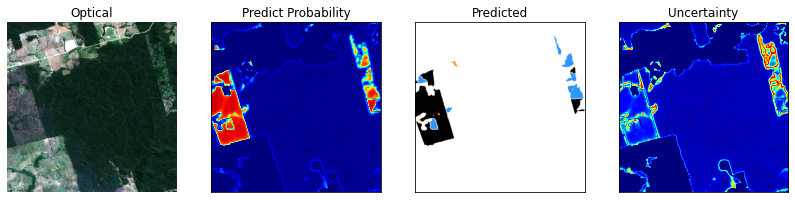

In [ ]:
trainer.logger.plotCropSample(trainer)

In [ ]:
trainer.selectUncertaintyMethod()

In [ ]:
trainer.logger.getStats(trainer.uncertainty)

ic| np.min(value): 0.026696656
    np.mean(value): 0.10519347
    np.max(value): 1.0


In [ ]:
trainer.getUncertaintyAAValues()

ic| self.uncertainty.shape: (54126872,)
    self.label_mask_current_deforestation_test.shape: (54126872,)


[0.15, 0.2, 0.225, 0.25, 0.27, 0.3, 0.34, 0.36, 0.45, 0.55, 0.65, 0.8]
threshold 0.15
(46930443,) (46930443,)


ic| label_current_deforestation_test_classified_incorrect.shape: (7196429,)
    predicted_test_classified_incorrect.shape: (7196429,)


cm_correct [[46708089      339]
 [    8036   213979]]


ic| TP_H + FN_H + FP_H + TN_H: 7196429
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 7196429
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[6543994  139774]
 [ 109333  403328]]
[0.99841824 0.96380425 0.29125628 0.13295483 0.74263766 0.78673431]
threshold 0.2
(48145578,) (48145578,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5981294,)
    predicted_test_classified_incorrect.shape: (5981294,)


cm_correct [[47792993     3095]
 [    9782   339708]]


ic| TP_H + FN_H + FP_H + TN_H: 5981294
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 5981294
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[5459090  137018]
 [ 107587  277599]]
[0.99097149 0.97201064 0.46239158 0.11050507 0.66953116 0.72068819]
threshold 0.225
(48597832,) (48597832,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5529040,)
    predicted_test_classified_incorrect.shape: (5529040,)


cm_correct [[48200271     5633]
 [   10777   381151]]


ic| TP_H + FN_H + FP_H + TN_H: 5529040
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 5529040
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[5051812  134480]
 [ 106592  236156]]
[0.98543632 0.9725026  0.51880149 0.10214963 0.63716423 0.68900767]
threshold 0.25
(48997017,) (48997017,)


ic| label_current_deforestation_test_classified_incorrect.shape: (5129855,)
    predicted_test_classified_incorrect.shape: (5129855,)


cm_correct [[48563435     9141]
 [   11760   412681]]


ic| TP_H + FN_H + FP_H + TN_H: 5129855
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 5129855
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[4688648  130972]
 [ 105609  204626]]
[0.97832972 0.97229297 0.56171836 0.09477464 0.60973546 0.65958386]
threshold 0.27
(49293438,) (49293438,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4833434,)
    predicted_test_classified_incorrect.shape: (4833434,)


cm_correct [[48834108    12385]
 [   12614   434331]]


ic| TP_H + FN_H + FP_H + TN_H: 4833434
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 4833434
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[4417975  127728]
 [ 104755  182976]]
[0.97227545 0.97177729 0.59118714 0.08929823 0.58890777 0.63592731]
threshold 0.3
(49721434,) (49721434,)


ic| label_current_deforestation_test_classified_incorrect.shape: (4405438,)
    predicted_test_classified_incorrect.shape: (4405438,)


cm_correct [[49227748    18342]
 [   13943   461401]]


ic| TP_H + FN_H + FP_H + TN_H: 4405438
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 4405438
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[4024335  121771]
 [ 103426  155906]]
[0.96176703 0.97066756 0.62803331 0.08139096 0.5614653  0.60118304]
threshold 0.34
(50268342,) (50268342,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3858530,)
    predicted_test_classified_incorrect.shape: (3858530,)


cm_correct [[49733933    28533]
 [   15867   490009]]


ic| TP_H + FN_H + FP_H + TN_H: 3858530
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 3858530
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[3518150  111580]
 [ 101502  127298]]
[0.94497456 0.96863461 0.66697292 0.07128677 0.53289964 0.55637238]
threshold 0.36
(50524344,) (50524344,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3602528,)
    predicted_test_classified_incorrect.shape: (3602528,)


cm_correct [[49971614    34129]
 [   16973   501628]]


ic| TP_H + FN_H + FP_H + TN_H: 3602528
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 3602528
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[3280469  105984]
 [ 100396  115679]]
[0.93629761 0.96727156 0.68278806 0.06655711 0.52186878 0.53536504]
threshold 0.45
(51481038,) (51481038,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2645834,)
    predicted_test_classified_incorrect.shape: (2645834,)


cm_correct [[50857664    59944]
 [   23170   540260]]


ic| TP_H + FN_H + FP_H + TN_H: 2645834
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 2645834
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[2394419   80169]
 [  94199   77047]]
[0.90012729 0.95887688 0.73537178 0.04888208 0.49007099 0.44992   ]
threshold 0.55
(52262307,) (52262307,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1864565,)
    predicted_test_classified_incorrect.shape: (1864565,)


cm_correct [[51566624    90069]
 [   31895   573719]]


ic| TP_H + FN_H + FP_H + TN_H: 1864565
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1864565
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[1685459   50044]
 [  85474   43588]]
[0.86431059 0.94733444 0.78091431 0.03444805 0.46552461 0.33772915]
threshold 0.65
(52931480,) (52931480,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1195392,)
    predicted_test_classified_incorrect.shape: (1195392,)
ic| TP_H + FN_H + FP_H + TN_H: 1195392
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1195392
    len(label_mask_current_deforestation_test): 54126872


cm_correct [[52168335   118548]
 [   44181   600416]]
cm_incorrect [[1083748   21565]
 [  73188   16891]]
[0.83511275 0.9314595  0.81725278 0.022085   0.43922925 0.18751318]
threshold 0.8
(53696297,) (53696297,)


ic| label_current_deforestation_test_classified_incorrect.shape: (430575,)
    predicted_test_classified_incorrect.shape: (430575,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:299: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 430575
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 430575
    len(label_mask_current_deforestation_test): 54126872


cm_correct [[52863851   140113]
 [   75026   617307]]
cm_incorrect [[388232      0]
 [ 42343      0]]
[0.81501281 0.89163307 0.84024386 0.00795492        nan 0.        ]


In [ ]:
trainer.getUncertaintyAAAuditedValues()

ic| self.uncertainty.shape: (54126872,)
    self.label_mask_current_deforestation_test.shape: (54126872,)


threshold 0.15
(54126872,) (54126872,)
cm_audited [[53391857      339]
 [    8036   726640]]
[0.99953369 0.98906184]
threshold 0.2
(54126872,) (54126872,)
cm_audited [[53389101     3095]
 [    9782   724894]]
[0.99574856 0.98668529]
threshold 0.225
(54126872,) (54126872,)
cm_audited [[53386563     5633]
 [   10777   723899]]
[0.99227861 0.98533095]
threshold 0.25
(54126872,) (54126872,)
cm_audited [[53383055     9141]
 [   11760   722916]]
[0.98751327 0.98399294]
threshold 0.27
(54126872,) (54126872,)
cm_audited [[53379811    12385]
 [   12614   722062]]
[0.98313697 0.98283053]
threshold 0.3
(54126872,) (54126872,)
cm_audited [[53373854    18342]
 [   13943   720733]]
[0.97518249 0.98102157]
threshold 0.34
(54126872,) (54126872,)
cm_audited [[53363663    28533]
 [   15867   718809]]
[0.96182069 0.97840272]
threshold 0.36
(54126872,) (54126872,)
cm_audited [[53358067    34129]
 [   16973   717703]]
[0.95460555 0.9768973 ]
threshold 0.45
(54126872,) (54126872,)
cm_audited [[53332252    5

ic| metric_values_audited: array([[0.99953369, 0.98906184],
                                  [0.99574856, 0.98668529],
                                  [0.99227861, 0.98533095],
                                  [0.98751327, 0.98399294],
                                  [0.98313697, 0.98283053],
                                  [0.97518249, 0.98102157],
                                  [0.96182069, 0.97840272],
                                  [0.95460555, 0.9768973 ],
                                  [0.92229697, 0.96846229],
                                  [0.88639844, 0.9565863 ],
                                  [0.85347132, 0.93986329],
                                  [0.82480685, 0.89787879]])


cm_audited [[53252083   140113]
 [   75026   659650]]
[0.82480685 0.89787879]


In [ ]:
trainer.setPlotLimsForUncertaintyAA()

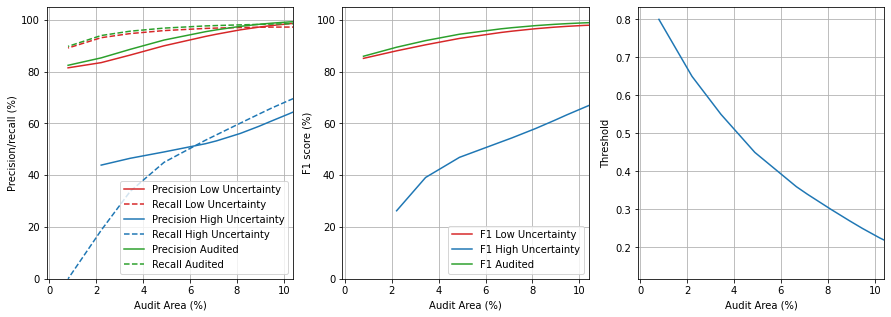

In [ ]:
trainer.plotUncertaintyAA()

In [ ]:
trainer.getOptimalUncertaintyThreshold()

ic| bounds: (0.015, 0.9985)
c:\Users\jchamorro\Anaconda3\envs\tf2\lib\site-packages\scipy\optimize\_minimize.py:783: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


0.3906635720644784
threshold 0.3906635720644784
(50886424,) (50886424,)


ic| label_current_deforestation_test_classified_incorrect.shape: (3240448,)
    predicted_test_classified_incorrect.shape: (3240448,)


cm_correct [[50308287    42805]
 [   18743   516589]]


ic| TP_H + FN_H + FP_H + TN_H: 3240448
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 3240448
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[2943796   97308]
 [  98626  100718]]
[0.92347969 0.96498808 0.70315214 0.05986764 0.50860998 0.50524721]
0.6228364279355216
threshold 0.6228364279355216
(52758533,) (52758533,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1368339,)
    predicted_test_classified_incorrect.shape: (1368339,)
ic| TP_H + FN_H + FP_H + TN_H: 1368339
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1368339
    len(label_mask_current_deforestation_test): 54126872

cm_correct [[52012918   111374]
 [   40220   594021]]
cm_incorrect [[1239165   28739]
 [  77149   23286]]


[0.84211116 0.93658562 0.80854826 0.02528022 0.4475925  0.23185145]
0.7663271441289569
threshold 0.7663271441289569
(53565238,) (53565238,)


ic| label_current_deforestation_test_classified_incorrect.shape: (561634,)
    predicted_test_classified_incorrect.shape: (561634,)
d:\Jorge\deforestation_uncertainty\src\metrics.py:299: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_H = TP_H / (TP_H + FP_H)
ic| TP_H + FN_H + FP_H + TN_H: 561634
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 561634
    len(label_mask_current_deforestation_test): 54126872


cm_correct [[52742308   140113]
 [   65510   617307]]
cm_incorrect [[509775      0]
 [ 51859      0]]
[0.81501281 0.90405921 0.84024386 0.01037625        nan 0.        ]
0.6026347139842636
threshold 0.6026347139842636
(52626316,) (52626316,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1500556,)
    predicted_test_classified_incorrect.shape: (1500556,)
ic| TP_H + FN_H + FP_H +

cm_correct [[51893889   105838]
 [   37651   588938]]
cm_incorrect [[1358194   34275]
 [  79718   28369]]


 TN_H: 1500556
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1500556
    len(label_mask_current_deforestation_test): 54126872


[0.84766601 0.93991117 0.80162956 0.02772294 0.45286061 0.2624645 ]
0.5216689424050333
threshold 0.5216689424050333
(52057281,) (52057281,)


ic| label_current_deforestation_test_classified_incorrect.shape: (2069591,)
    predicted_test_classified_incorrect.shape: (2069591,)


cm_correct [[51381952    81446]
 [   29247   564636]]


ic| TP_H + FN_H + FP_H + TN_H: 2069591
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 2069591
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[1870131   58667]
 [  88122   52671]]
[0.8739386  0.95075293 0.76855103 0.03823592 0.47307298 0.37410241]
0.5812909564524222
threshold 0.5812909564524222
(52481618,) (52481618,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1645254,)
    predicted_test_classified_incorrect.shape: (1645254,)


cm_correct [[51763964    99591]
 [   35107   582956]]
cm_incorrect [[1488119   40522]
 [  82262   34351]]


ic| TP_H + FN_H + FP_H + TN_H: 1645254
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1645254
    len(label_mask_current_deforestation_test): 54126872


[0.85408917 0.94319835 0.7934872  0.03039625 0.45879022 0.29457265]
0.5585173735640433
threshold 0.5585173735640433
(52322943,) (52322943,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1803929,)
    predicted_test_classified_incorrect.shape: (1803929,)


cm_correct [[51621218    92678]
 [   32733   576314]]
cm_incorrect [[1630865   47435]
 [  84636   40993]]


ic| TP_H + FN_H + FP_H + TN_H: 1803929
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1803929
    len(label_mask_current_deforestation_test): 54126872


[0.86146621 0.94625538 0.78444648 0.03332779 0.46357489 0.32630205]
0.5829988061904113
threshold 0.5829988061904113
(52493322,) (52493322,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1633550,)
    predicted_test_classified_incorrect.shape: (1633550,)
ic

cm_correct [[51774496   100092]
 [   35290   583444]]
cm_incorrect [[1477587   40021]
 [  82079   33863]]


| TP_H + FN_H + FP_H + TN_H: 1633550
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1633550
    len(label_mask_current_deforestation_test): 54126872


[0.85356733 0.94296418 0.79415144 0.03018002 0.45832657 0.29206845]
0.5879338080619391
threshold 0.5879338080619391
(52527246,) (52527246,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1599626,)
    predicted_test_classified_incorrect.shape: (1599626,)


cm_correct [[51804900   101566]
 [   35861   584919]]


ic| TP_H + FN_H + FP_H + TN_H: 1599626
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1599626
    len(label_mask_current_deforestation_test): 54126872


cm_incorrect [[1447183   38547]
 [  81508   32388]]
[0.85204921 0.94223235 0.79615912 0.02955327 0.45658702 0.28436468]
0.5848838091707906
threshold 0.5848838091707906
(52506288,) (52506288,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1620584,)
    predicted_test_classified_incorrect.shape: (1620584,)
ic

cm_correct [[51786082   100684]
 [   35512   584010]]
cm_incorrect [[1466001   39429]
 [  81857   33297]]


| TP_H + FN_H + FP_H + TN_H: 1620584
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1620584
    len(label_mask_current_deforestation_test): 54126872


[0.85295037 0.94267839 0.79492184 0.02994047 0.45784176 0.28915192]
0.5857729297188218
threshold 0.5857729297188218
(52512471,) (52512471,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1614401,)
    predicted_test_classified_incorrect.shape: (1614401,)
ic

cm_correct [[51791665   100929]
 [   35599   584278]]
cm_incorrect [[1460418   39184]
 [  81770   33029]]


| TP_H + FN_H + FP_H + TN_H: 1614401
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1614401
    len(label_mask_current_deforestation_test): 54126872


[0.85270291 0.94257086 0.79528663 0.02982624 0.45738302 0.28771157]
0.5844021290160002
threshold 0.5844021290160002
(52502951,) (52502951,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623921,)
    predicted_test_classified_incorrect.shape: (1623921,)
ic

cm_correct [[51783109   100522]
 [   35446   583874]]
cm_incorrect [[1468974   39591]
 [  81923   33433]]


| TP_H + FN_H + FP_H + TN_H: 1623921
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1623921
    len(label_mask_current_deforestation_test): 54126872


[0.85312305 0.94276626 0.79473673 0.03000212 0.45783578 0.28982454]
0.5838661073938138
threshold 0.5838661073938138
(52499194,) (52499194,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1627678,)
    predicted_test_classified_incorrect.shape: (1627678,)
ic

cm_correct [[51779731   100364]
 [   35390   583709]]
cm_incorrect [[1472352   39749]
 [  81979   33598]]


| TP_H + FN_H + FP_H + TN_H: 1627678
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1627678
    len(label_mask_current_deforestation_test): 54126872


[0.85328466 0.94283628 0.79451214 0.03007153 0.45806918 0.29069798]
0.5843687870145825
threshold 0.5843687870145825
(52502730,) (52502730,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1624142,)
    predicted_test_classified_incorrect.shape: (1624142,)
ic

cm_correct [[51782917   100513]
 [   35442   583858]]
cm_incorrect [[1469166   39600]
 [  81927   33449]]


| TP_H + FN_H + FP_H + TN_H: 1624142
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1624142
    len(label_mask_current_deforestation_test): 54126872


[0.85313083 0.94277087 0.79471495 0.0300062  0.45789812 0.28991298]
0.5845159586781132
threshold 0.5845159586781132
(52503754,) (52503754,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623118,)
    predicted_test_classified_incorrect.shape: (1623118,)
ic

cm_correct [[51783827   100556]
 [   35462   583909]]
cm_incorrect [[1468256   39557]
 [  81907   33398]]


| TP_H + FN_H + FP_H + TN_H: 1623118
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1623118
    len(label_mask_current_deforestation_test): 54126872


[0.85308818 0.94274514 0.79478437 0.02998729 0.45778905 0.28964919]
0.5844456080779995
threshold 0.5844456080779995
(52503265,) (52503265,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623607,)
    predicted_test_classified_incorrect.shape: (1623607,)
ic

cm_correct [[51783389   100535]
 [   35451   583890]]
cm_incorrect [[1468694   39578]
 [  81918   33417]]


| TP_H + FN_H + FP_H + TN_H: 1623607
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1623607
    len(label_mask_current_deforestation_test): 54126872
ic| self.threshold_optimal: 0.5844021290160002


[0.85311028 0.94276013 0.79475851 0.02999632 0.45779848 0.28973859]


In [ ]:
trainer.getUncertaintyMetricsFromOptimalThreshold()

threshold 0.5844021290160002
(52502951,) (52502951,)


ic| label_current_deforestation_test_classified_incorrect.shape: (1623921,)
    predicted_test_classified_incorrect.shape: (1623921,)
ic

cm_correct [[51783109   100522]
 [   35446   583874]]
cm_incorrect [[1468974   39591]
 [  81923   33433]]


| TP_H + FN_H + FP_H + TN_H: 1623921
    len(label_mask_current_deforestation_test): 54126872
ic| TP_H + FN_H + FP_H + TN_H: 1623921
    len(label_mask_current_deforestation_test): 54126872


[0.85312305 0.94276626 0.79473673 0.03000212 0.45783578 0.28982454]
threshold 0.5844021290160002
(54126872,) (54126872,)


ic| self.m_optimal: {'AA': array([0.03000212]),
                     'f1_H': array([0.35495276]),
                     'f1_L': array([0.89570735]),
                     'precision_H': array([0.45783578]),
                     'precision_L': array([0.85312305]),
                     'recall_H': array([0.28982454]),
                     'recall_L': array([0.94276626]),
                     'recall_Ltotal': array([0.79473673])}
ic| self.m_audited_optimal: {'f1': array([0.91138848]),
                             'precision': array([0.87430854]),
                             'recall': array([0.95175288])}


cm_audited [[53291674   100522]
 [   35446   699230]]
[0.87430854 0.95175288]
